## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [63]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [64]:
print(gdp_df.head())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2023  1992.424394              NaN
1     Afghanistan  2022  1981.710168              NaN
2     Afghanistan  2021  2144.166570              NaN
3     Afghanistan  2020  2769.685745              NaN
4     Afghanistan  2019  2927.245144              NaN


In [65]:
print(gdp_df.tail(5))

     Country or Area  Year        Value  Value Footnotes
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [24]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB
None


In [69]:
print(gdp_df.shape)

(8219, 4)


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [26]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [68]:
gdp_df = gdp_df.rename(columns={'Country or Area' : 'Country', 'Year': 'Year', 'Value' : 'GDP_Per_Capita'})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

247 unique countries and 34 unique years

In [70]:
unique_years = gdp_df['Year'].nunique()

print(unique_years)

34


In [71]:
countries_years = gdp_df.groupby('Country')['Year'].nunique()

print(countries_years)

Country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 247, dtype: int64


In [72]:
countries_with_all_years = countries_years[countries_years == unique_years]

print(countries_with_all_years)

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 228, dtype: int64


228 countries with all years

In [73]:
countries_missing_years = countries_years[countries_years < unique_years]

print(countries_missing_years)

Country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: Year, dtype: int64


In [74]:
gdp_observations_per_year=gdp_df.groupby('Year').count()

print(gdp_observations_per_year)

      Country  GDP_Per_Capita  Value Footnotes
Year                                          
1990      233             233                0
1991      234             234                0
1992      234             234                0
1993      234             234                0
1994      235             235                0
1995      236             236                0
1996      236             236                0
1997      238             238                0
1998      238             238                0
1999      238             238                0
2000      240             240                0
2001      240             240                0
2002      241             241                0
2003      241             241                0
2004      241             241                0
2005      241             241                0
2006      242             242                0
2007      242             242                0
2008      244             244                0
2009      245

".count()" counts non-NaN values in each column, not the rows themselves. So, it will give you the count of non-null values in each column for every group.
It returns one count per column that exists in the group (after grouping), so if you have 3 columns (Country, Year, GDP_Per_Capita), you will get 3 counts: one for each column (i.e., it will tell you how many non-NaN values exist in each of these columns for each group).

In [75]:
gdp_observations_per_year=gdp_df.groupby('Year').size()

print(gdp_observations_per_year)

Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
dtype: int64


".size()" counts all rows in each group, regardless of whether the values are missing (NaN) or not.
It doesn't care about the individual columns in your DataFrame. Instead, it simply counts how many rows (or observations) there are for each group.
The result of .size() is a single column containing the row count for each group, as it’s focused on the number of rows rather than column-specific data.

Look at the number of observations per year. What do you notice?
It looks like 2013 - 2021 have the most consistant volume of data. With the count of entries being 247 across those years. 

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Histogram ".hist()"

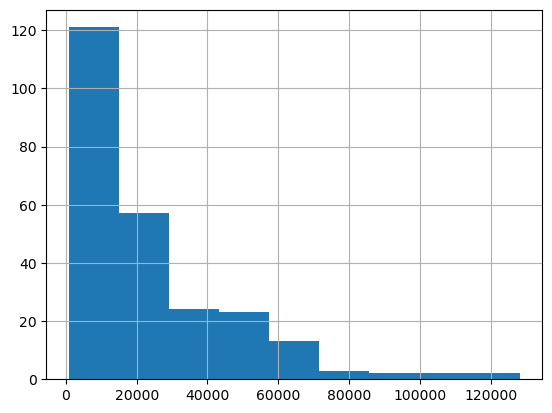

In [76]:
gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'].hist(bins=9)

plt.show()

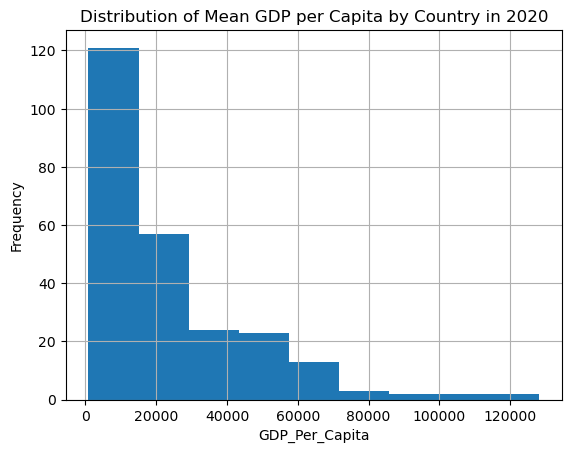

In [77]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]

gdp_2020_country = gdp_2020.groupby('Country')['GDP_Per_Capita'].mean()

gdp_2020_country.hist(bins=9)

plt.xlabel('GDP_Per_Capita')
plt.ylabel('Frequency')
plt.title('Distribution of Mean GDP per Capita by Country in 2020')

plt.show()

Grouping by country doesn't appear to change the histogram for 2020. 

Researched what bins were and the best way to determine the number of bins to use. 

Bins: Bins are essentially categories or intervals that divide the range of your data into smaller, non-overlapping segments. The height of each bar in the histogram corresponds to the number of data points that fall within that particular bin. Imagine you have a dataset of student ages. You could create bins like: 0-5, 6-10, 11-15, etc. Then, each bar in the histogram would represent the number of students within each age range. 

best way to determine the number of bins to use:  Square Root Rule or Sturges' Rule.
Square Root Rule:  Number of bins = ⌈√n⌉
32 bins with the square root rule having 247 data points in 2020

Used Sturges' Rule to determine the number of bins:
Sturges' Rule gives you the number of bins based on the size of your dataset. The formula is: Number of bins = 1 + log2(n)
9 bins using Sturges' Rule having 247 data points in 2020
- look up Step-by-Step Calculation for Sturges' Rule -

Density plot:
Is a way to represent the distribution of a dataset in a smooth curve, rather than a histogram, which is a stepped approximation. The KDE gives you a continuous curve that provides a better sense of the data’s underlying distribution.
Makes it easier to see the mean or median, the spread of the data, and the presence of any multimodal behavior (i.e., multiple peaks).
Helps in Comparing Distributions: KDE plots can also be useful when comparing the distributions of multiple variables or datasets in one plot (e.g., comparing two different years or two different groups). You can overlay multiple KDEs to understand how the distributions of different data sets compare.
It works by placing a small "bump" (kernel) at each data point and then summing the contributions of all the bumps to get a smooth curve.
shade: If True, fills the area under the KDE curve with the color specified. It's useful for emphasizing the area under the curve.
bw_adjust: This controls the bandwidth of the kernel. The bandwidth determines the smoothness of the curve. A smaller value results in a more sensitive curve (with more peaks), while a larger value results in a smoother curve.
vertical: If True, plots the KDE vertically.
legend: If True, includes a legend for multiple KDE plots.
fill: If True, fills the area under the curve.

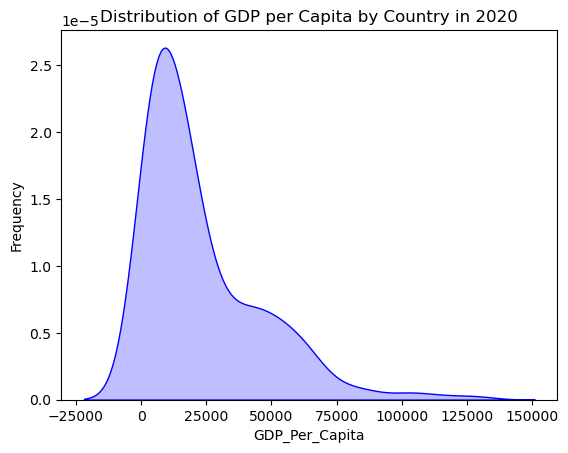

In [91]:
sns.kdeplot(gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita'], color='blue', fill=True, bw_adjust=1)

plt.xlabel('GDP_Per_Capita')
plt.ylabel('Frequency')
plt.title('Distribution of GDP per Capita by Country in 2020')

plt.show()

Violin plot:

A violin plot is a visualization tool for understanding the distribution of a continuous variable across different categories (or groups). It combines aspects of both a box plot and a kernel density estimate (KDE) plot, making it highly informative.

A violin plot provides a smooth density curve. This curve shows you the full distribution of the data and can reveal insights like skewness, bimodal distributions, and outliers. Understand the underlying distribution of a dataset, not just summary statistics.

Compare the distribution of a continuous variable across multiple categories (e.g., comparing the income distribution across different regions).

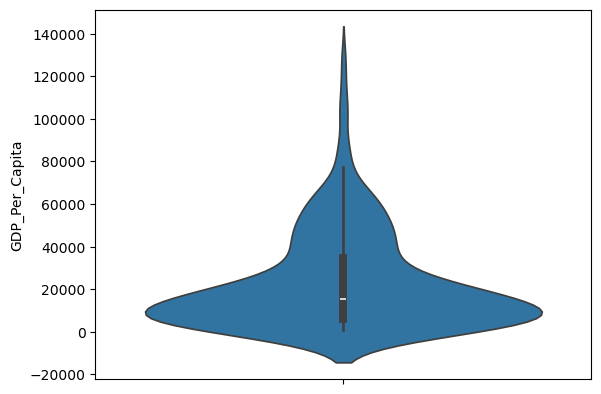

In [110]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

sns.violinplot(y="GDP_Per_Capita", data=gdp_2020)

plt.show()

9. What was the median GDP per capita value in 2020?

In [116]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

median_gdp_2020 = round(gdp_2020['GDP_Per_Capita'].median(),2)

print(median_gdp_2020)

15309.24


GDP per capita= Gross Domestic Product (GDP)/Population

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

11. Which country was the first to have a GDP per capita greater than $100,000?

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.